In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [2]:
# Define each directory for the required paths with updated paths
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
# Process each directory with lib.DataUitzoekenGui
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [60]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result2:
    merged_df = result2['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Externe ingangsspanning, in V","2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.293000,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,1.293000,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,1.293500,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,1.292857,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,1.292667,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320333,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70


In [61]:
# Convert '1_Tijd' from HHMMSS format to seconds since midnight
def hhmmss_to_seconds(hhmmss):
    hours = hhmmss // 10000
    minutes = (hhmmss % 10000) // 100
    seconds = hhmmss % 100
    return hours * 3600 + minutes * 60 + seconds

# Apply conversion to the time column
merged_df['Time_in_seconds'] = merged_df['1_Tijd'].apply(hhmmss_to_seconds)

#filter de data vanaf tijdstip 170000 tot 190000
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 0]
merged_df = merged_df[merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]
merged_df = merged_df[merged_df['Time_in_seconds'] < 38000]
merged_df = merged_df[merged_df['Time_in_seconds'] > 36750]

display(merged_df)
lib.plot_trajectory_map(merged_df['1_Latitude'].dropna(), merged_df['1_Longitude'].dropna(), merged_df['1_Snelheid over de grond in km/h'].dropna())

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:19:20,9.0,1160.4552,1166.060,101231.0,5233.2851,446.5614,7.2,117.2,241024.0,NaN,...,5.068667,5.754167,0.026667,24.203000,38.700000,12.100000,B,21|02,4575.75,36751.0
0 days 00:19:21,9.0,1161.4551,1167.059,101232.0,5233.2846,446.5631,7.4,116.1,241024.0,NaN,...,5.070429,5.756429,0.026714,24.208286,38.742857,12.100000,B,21|02,4576.65,36752.0
0 days 00:19:22,9.0,1162.4919,1168.095,101233.0,5233.2841,446.5649,7.2,114.2,241024.0,NaN,...,5.070286,5.756571,0.026571,24.205571,38.742857,12.100000,B,21|02,4577.70,36753.0
0 days 00:19:23,9.0,1163.4569,1169.060,101234.0,5233.2838,446.5666,7.4,112.7,241024.0,NaN,...,5.067667,5.753500,0.026333,24.193500,38.733333,12.100000,B,21|02,4578.75,36754.0
0 days 00:19:24,9.0,1164.4660,1170.069,101235.0,5233.2835,446.5684,7.4,110.7,241024.0,NaN,...,5.068857,5.754857,0.026143,24.190857,38.742857,12.071429,B,21|02,4579.65,36755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:40:04,9.0,2404.4745,2410.265,103315.0,5233.3495,446.2886,26.9,299.2,241024.0,NaN,...,5.072000,5.758500,0.026667,24.520833,38.733333,12.100000,B,21|02,5819.70,37995.0
0 days 00:40:05,9.0,2405.4386,2411.229,103316.0,5233.3514,446.2828,26.9,298.4,241024.0,NaN,...,5.073714,5.760857,0.026857,24.525143,38.700000,12.100000,B,21|02,5820.60,37996.0
0 days 00:40:06,9.0,2406.4388,2412.229,103317.0,5233.3532,446.2772,26.9,297.5,241024.0,NaN,...,5.075286,5.761857,0.026857,24.529000,38.757143,12.100000,B,21|02,5821.65,37997.0


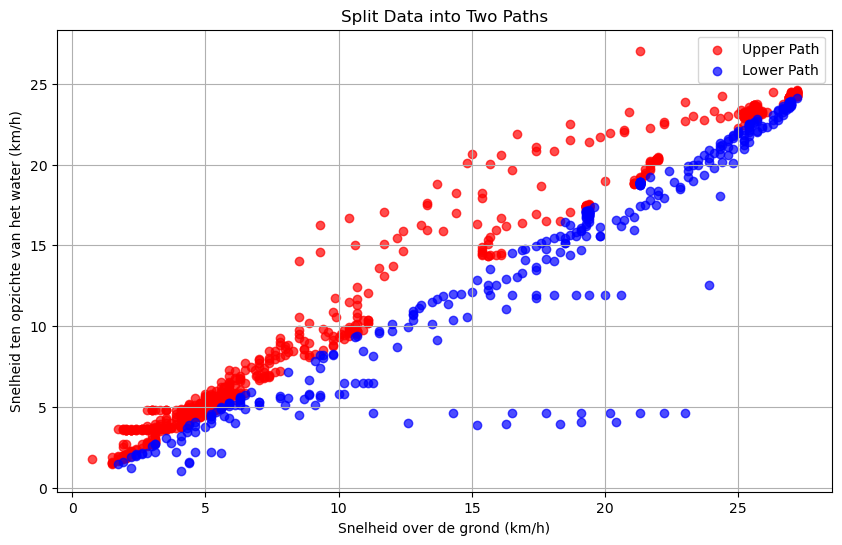

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Only take the data if he snelheid over the grond is higher then 6
#merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 6]

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]

# Plot the split paths
plt.figure(figsize=(10, 6))
plt.scatter(upper_path['1_Snelheid over de grond in km/h'], upper_path['1_Snelheid tenopzichte van het water in Kilometers per uur'], label="Upper Path", color="red", alpha=0.7)
plt.scatter(lower_path['1_Snelheid over de grond in km/h'], lower_path['1_Snelheid tenopzichte van het water in Kilometers per uur'], label="Lower Path", color="blue", alpha=0.7)
#plt.plot(x, y_predicted, label="Fitted Line: y = 0.889x", color="black", linewidth=2)
plt.xlabel("Snelheid over de grond (km/h)")
plt.ylabel("Snelheid ten opzichte van het water (km/h)")
plt.legend()
plt.title("Split Data into Two Paths")
plt.grid(True)
plt.show()


In [67]:
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:19:20,9.0,1160.4552,1166.060,101231.0,5233.2851,446.5614,7.2,117.2,241024.0,NaN,...,5.068667,5.754167,0.026667,24.203000,38.700000,12.100000,B,21|02,4575.75,36751.0
0 days 00:19:21,9.0,1161.4551,1167.059,101232.0,5233.2846,446.5631,7.4,116.1,241024.0,NaN,...,5.070429,5.756429,0.026714,24.208286,38.742857,12.100000,B,21|02,4576.65,36752.0
0 days 00:19:22,9.0,1162.4919,1168.095,101233.0,5233.2841,446.5649,7.2,114.2,241024.0,NaN,...,5.070286,5.756571,0.026571,24.205571,38.742857,12.100000,B,21|02,4577.70,36753.0
0 days 00:19:23,9.0,1163.4569,1169.060,101234.0,5233.2838,446.5666,7.4,112.7,241024.0,NaN,...,5.067667,5.753500,0.026333,24.193500,38.733333,12.100000,B,21|02,4578.75,36754.0
0 days 00:19:24,9.0,1164.4660,1170.069,101235.0,5233.2835,446.5684,7.4,110.7,241024.0,NaN,...,5.068857,5.754857,0.026143,24.190857,38.742857,12.071429,B,21|02,4579.65,36755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:40:04,9.0,2404.4745,2410.265,103315.0,5233.3495,446.2886,26.9,299.2,241024.0,NaN,...,5.072000,5.758500,0.026667,24.520833,38.733333,12.100000,B,21|02,5819.70,37995.0
0 days 00:40:05,9.0,2405.4386,2411.229,103316.0,5233.3514,446.2828,26.9,298.4,241024.0,NaN,...,5.073714,5.760857,0.026857,24.525143,38.700000,12.100000,B,21|02,5820.60,37996.0
0 days 00:40:06,9.0,2406.4388,2412.229,103317.0,5233.3532,446.2772,26.9,297.5,241024.0,NaN,...,5.075286,5.761857,0.026857,24.529000,38.757143,12.100000,B,21|02,5821.65,37997.0


In [68]:
import matplotlib.pyplot as plt

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

x, y

(Indextijd
 0 days 00:19:20     7.2
 0 days 00:19:21     7.4
 0 days 00:19:22     7.2
 0 days 00:19:23     7.4
 0 days 00:19:24     7.4
                    ... 
 0 days 00:40:04    26.9
 0 days 00:40:05    26.9
 0 days 00:40:06    26.9
 0 days 00:40:07    26.9
 0 days 00:40:08    26.9
 Name: 1_Snelheid over de grond in km/h, Length: 1107, dtype: float64,
 Indextijd
 0 days 00:19:20     6.80
 0 days 00:19:21     6.82
 0 days 00:19:22     6.87
 0 days 00:19:23     6.93
 0 days 00:19:24     6.96
                    ...  
 0 days 00:40:04    24.19
 0 days 00:40:05    24.19
 0 days 00:40:06    24.17
 0 days 00:40:07    24.17
 0 days 00:40:08    24.13
 Name: 1_Snelheid tenopzichte van het water in Kilometers per uur, Length: 1107, dtype: float64)

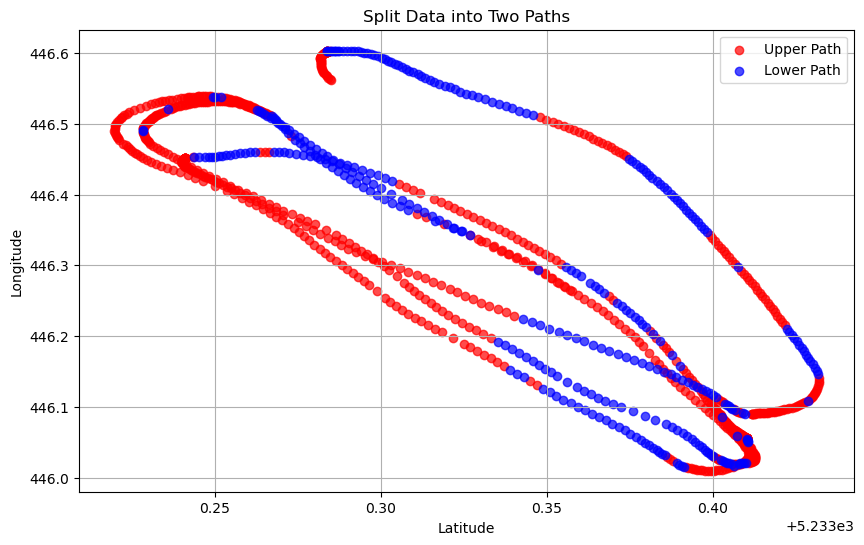

In [69]:
'''Plotting the seperate upper and lower data as latitude and longitude to see where the data is'''

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]

# Plot the split paths
plt.figure(figsize=(10, 6))
plt.scatter(upper_path['1_Latitude'], upper_path['1_Longitude'], label="Upper Path", color="red", alpha=0.7)
plt.scatter(lower_path['1_Latitude'], lower_path['1_Longitude'], label="Lower Path", color="blue", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.title("Split Data into Two Paths")
plt.grid(True)
plt.show()


In [71]:
'''Make a simple animation of plotting the latitude and longitude data over time in an animation'''
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Prepare the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(merged_df['1_Latitude'].min() - 0.01, merged_df['1_Latitude'].max() + 0.01)
ax.set_ylim(merged_df['1_Longitude'].min() - 0.01, merged_df['1_Longitude'].max() + 0.01)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_title("Dynamic Plot of Latitude and Longitude")

# Initialize the scatter plot
scat = ax.scatter([], [], color='blue', alpha=0.7)

# Update function for animation
def update(frame):
    start = frame * 10
    end = min(start + 10, len(merged_df))
    if start >= len(merged_df):  # Stop updating if we exceed the data
        return

    # Extract chunk data
    chunk_lat = merged_df['1_Latitude'].iloc[start:end]
    chunk_lon = merged_df['1_Longitude'].iloc[start:end]

    # Debugging: Print chunk info
    print(f"Frame: {frame}, Start: {start}, End: {end}, Chunk Size: {len(chunk_lat)}")

    # Update the scatter plot
    scat.set_offsets(np.column_stack((chunk_lat, chunk_lon)))
    
# Create the animation
anim = FuncAnimation(fig, update, frames=(len(merged_df) // 10) + 1, repeat=False, interval=200)



In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Set the speed threshold for filtering
speed_threshold = 6

# Filter the data
filtered_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > speed_threshold]

# Prepare residual classification
x = filtered_df['1_Snelheid over de grond in km/h']
y = filtered_df['1_Snelheid tenopzichte van het water in Kilometers per uur']
y_predicted = predict_y(x)
residuals = y - y_predicted

# Cumulative datasets for the second plot
cumulative_upper_x = []
cumulative_upper_y = []
cumulative_lower_x = []
cumulative_lower_y = []

# Prepare the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Latitude/Longitude Plot (Dynamic Points)
ax1.set_xlim(merged_df['1_Latitude'].min() - 0.01, merged_df['1_Latitude'].max() + 0.01)
ax1.set_ylim(merged_df['1_Longitude'].min() - 0.01, merged_df['1_Longitude'].max() + 0.01)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Dynamic Plot of Latitude and Longitude")
scatter_lat_lon = ax1.scatter([], [], alpha=0.7)

# Residuals Classification Plot
ax2.set_xlim(0, filtered_df['1_Snelheid over de grond in km/h'].max() + 5)
ax2.set_ylim(0, filtered_df['1_Snelheid tenopzichte van het water in Kilometers per uur'].max() + 5)
ax2.set_xlabel("Snelheid over de grond (km/h)")
ax2.set_ylabel("Snelheid ten opzichte van het water (km/h)")
ax2.set_title("Residual Classification Plot")
scatter_upper = ax2.scatter([], [], color="red", alpha=0.7, label="Upper Path")
scatter_lower = ax2.scatter([], [], color="blue", alpha=0.7, label="Lower Path")
ax2.legend()

# Update function for animation
def update(frame):
    # Latitude/Longitude Updates
    start = frame * 5
    end = min(start + 5, len(merged_df))
    if start >= len(merged_df):  # Stop updating if we exceed the data
        return

    chunk_lat = merged_df['1_Latitude'].iloc[start:end]
    chunk_lon = merged_df['1_Longitude'].iloc[start:end]
    scatter_lat_lon.set_offsets(np.column_stack((chunk_lat, chunk_lon)))

    # Residual Classification Updates
    chunk_x = x.iloc[start:end]
    chunk_y = y.iloc[start:end]
    chunk_residuals = residuals.iloc[start:end]

    # Add new points to the cumulative datasets
    cumulative_upper_x.extend(chunk_x[chunk_residuals > 0])
    cumulative_upper_y.extend(chunk_y[chunk_residuals > 0])
    cumulative_lower_x.extend(chunk_x[chunk_residuals <= 0])
    cumulative_lower_y.extend(chunk_y[chunk_residuals <= 0])

    # Update the scatter plots with cumulative data
    scatter_upper.set_offsets(np.column_stack((cumulative_upper_x, cumulative_upper_y)))
    scatter_lower.set_offsets(np.column_stack((cumulative_lower_x, cumulative_lower_y)))

    # Debugging Info
    print(f"Frame: {frame}, Start: {start}, End: {end}, Chunk Size: {len(chunk_lat)}")

# Create the animation
anim = FuncAnimation(
    fig,
    update,
    frames=(len(merged_df) // 5) + 1,
    repeat=False,
    interval=500
)

# Display the animation
plt.show()


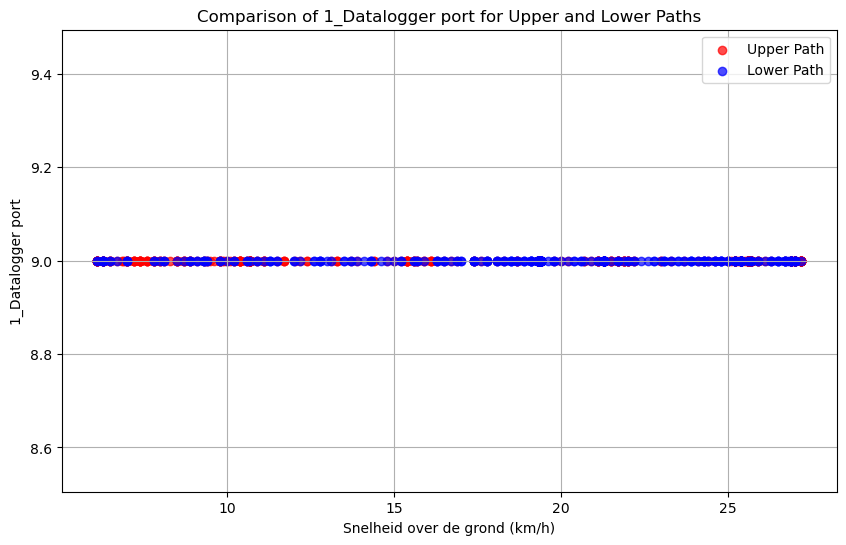

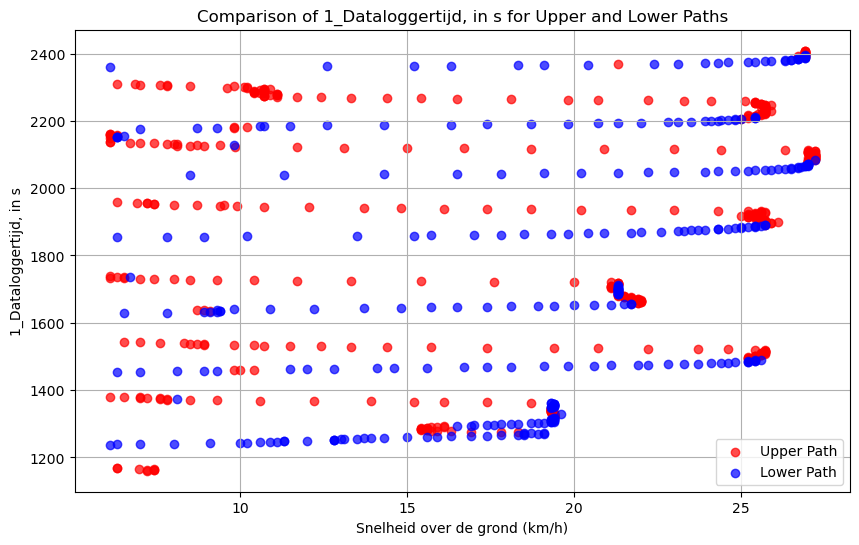

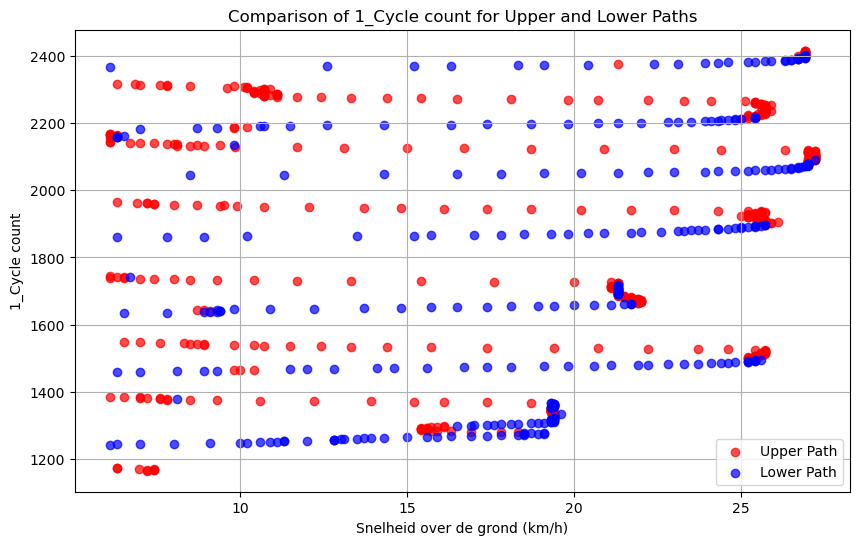

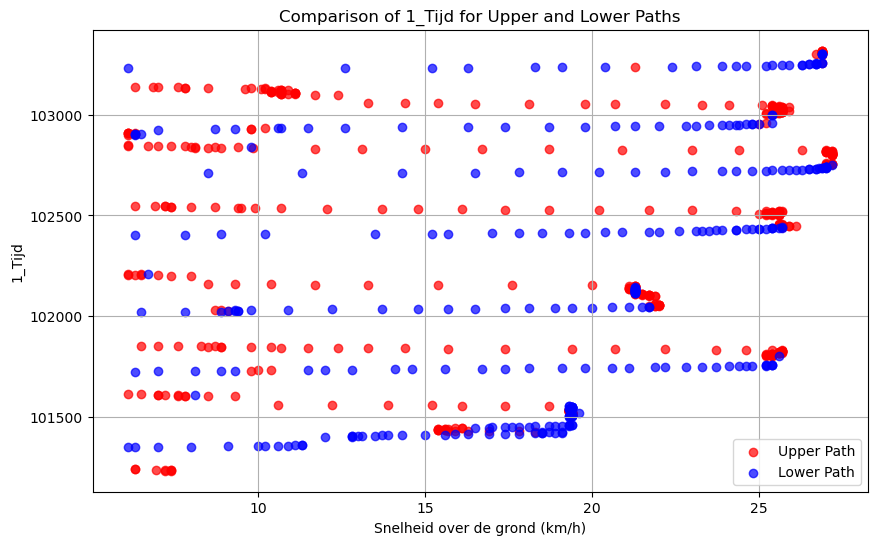

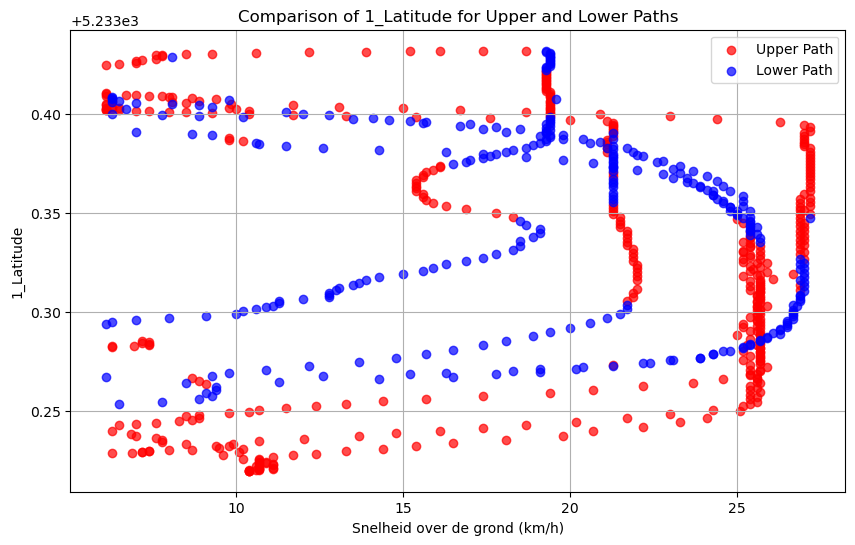

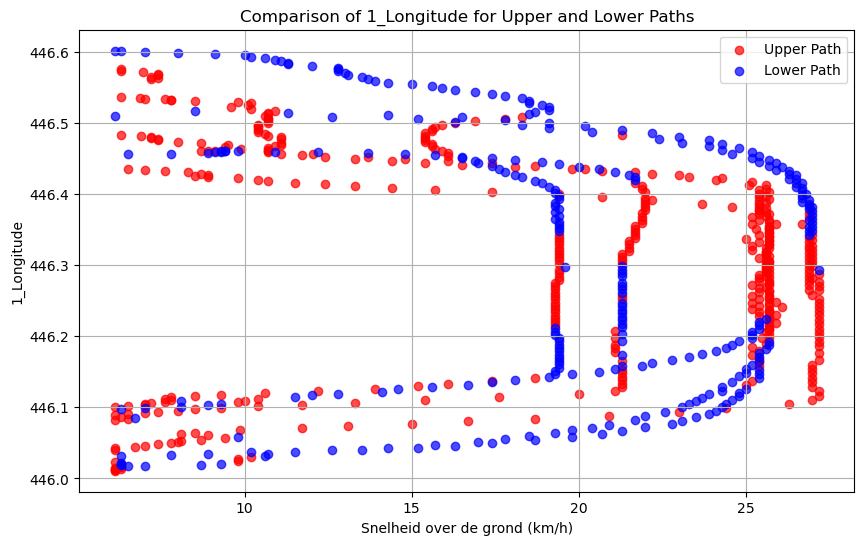

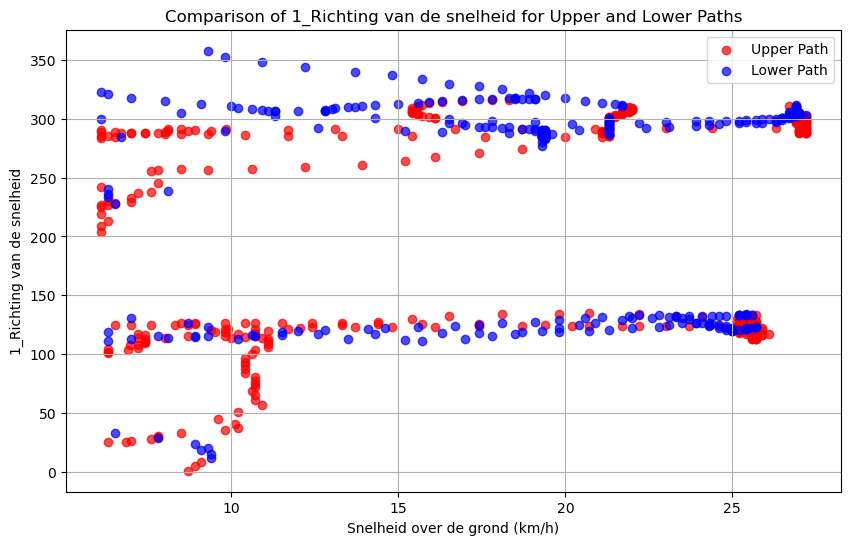

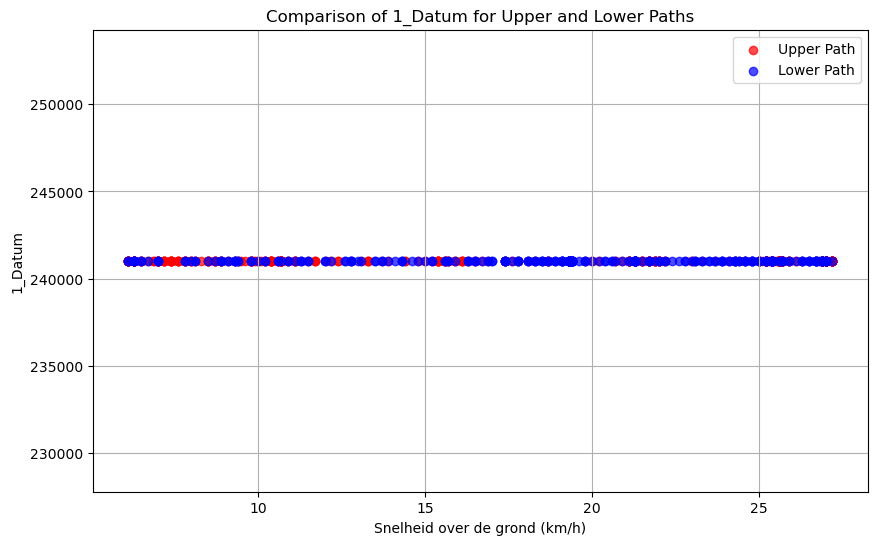

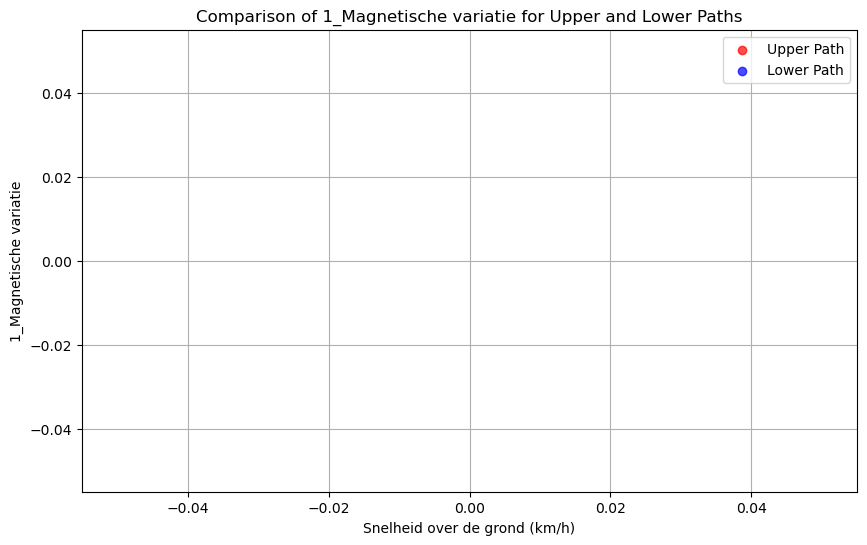

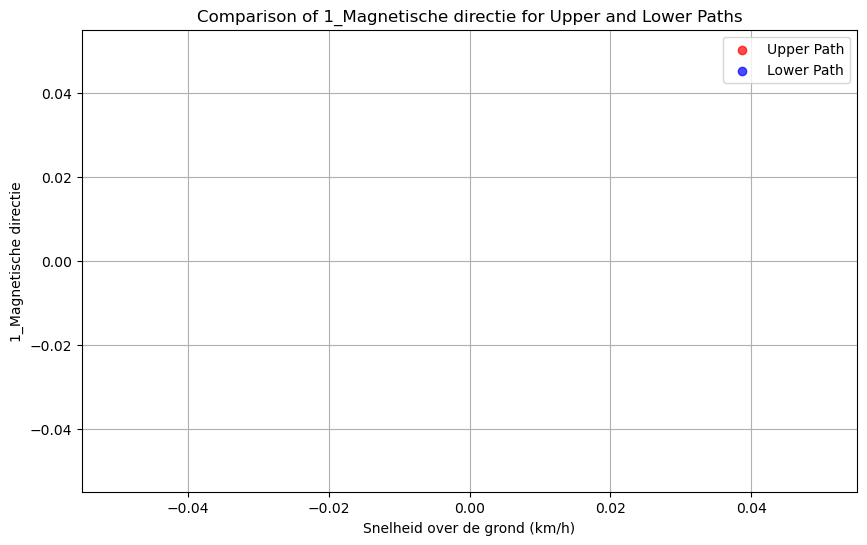

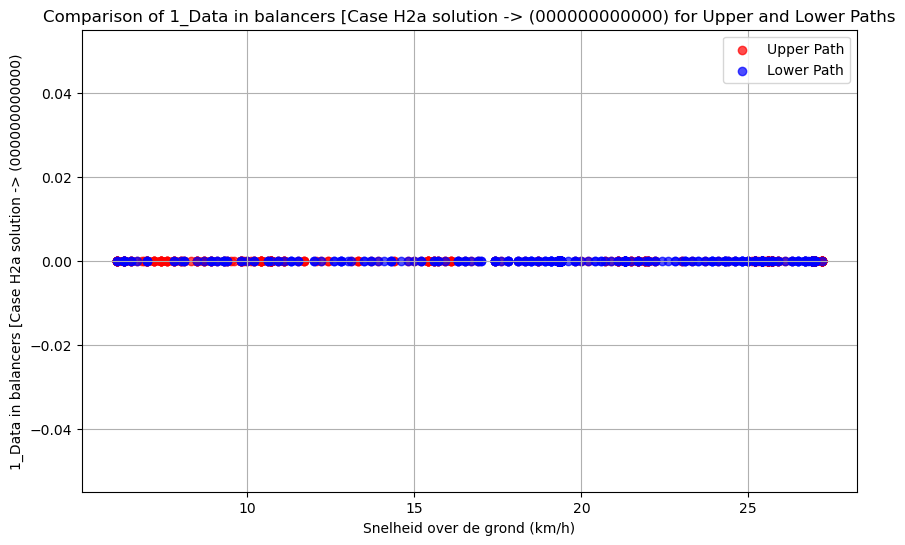

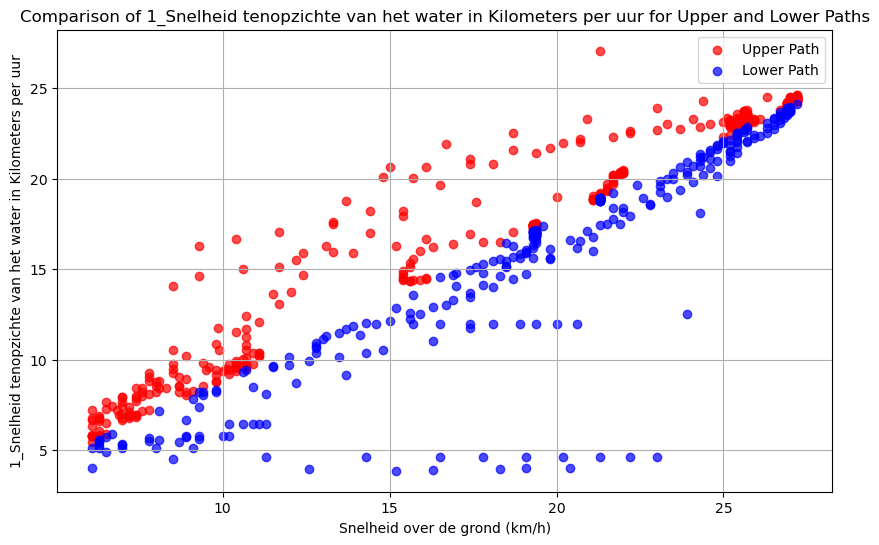

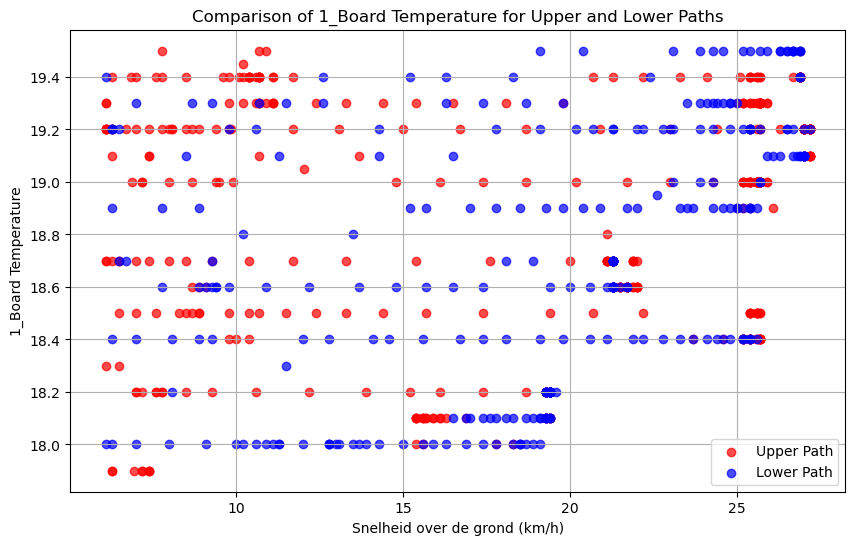

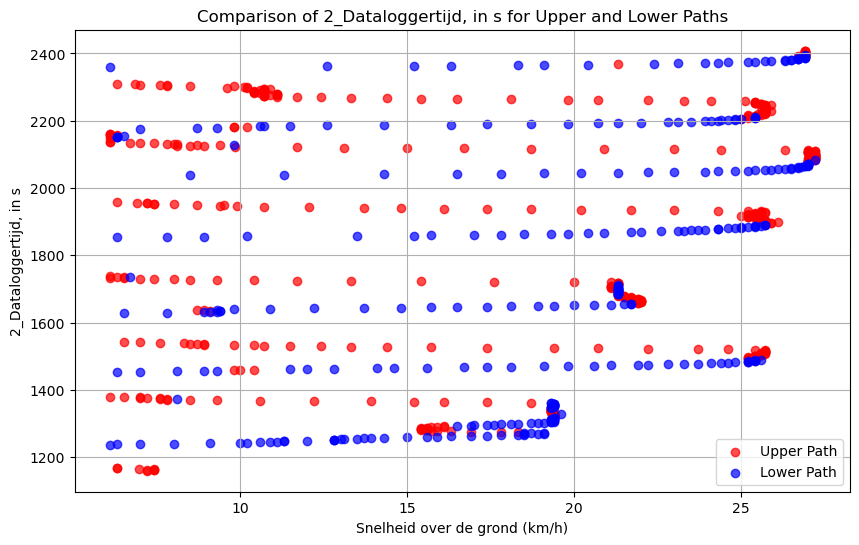

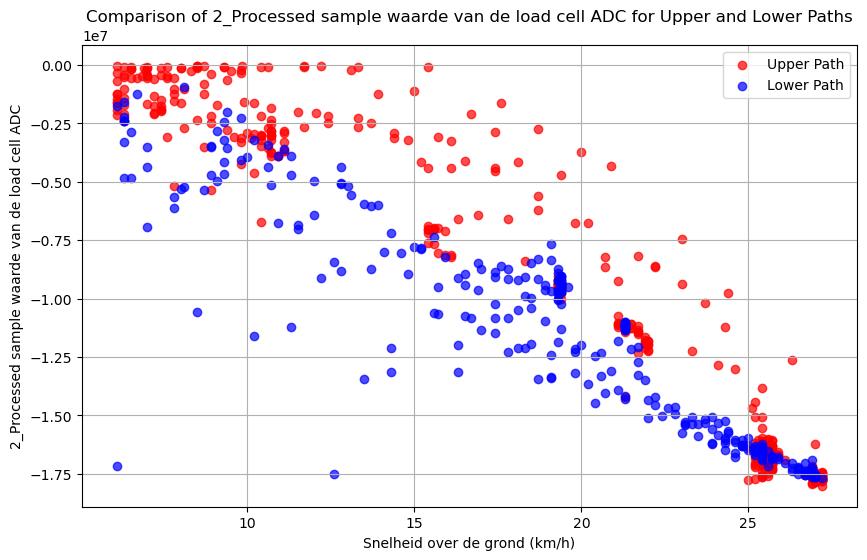

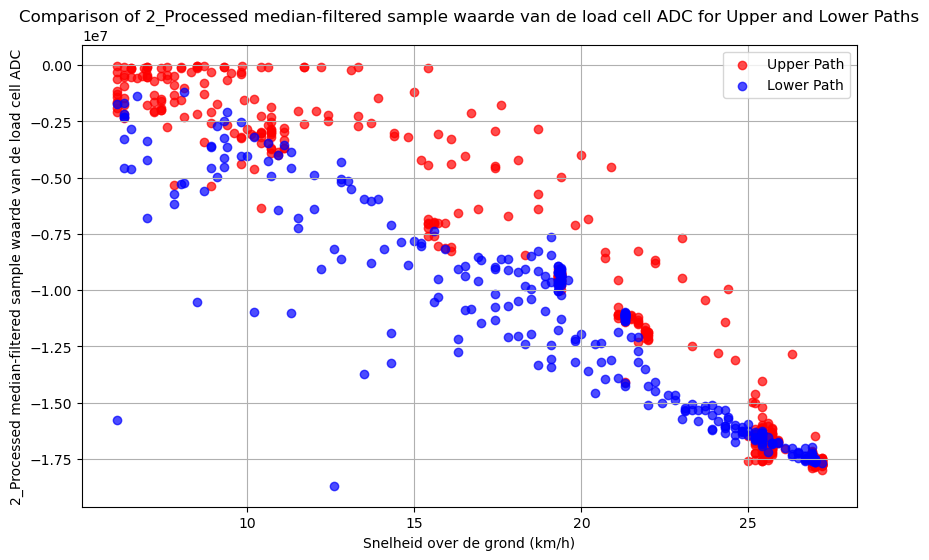

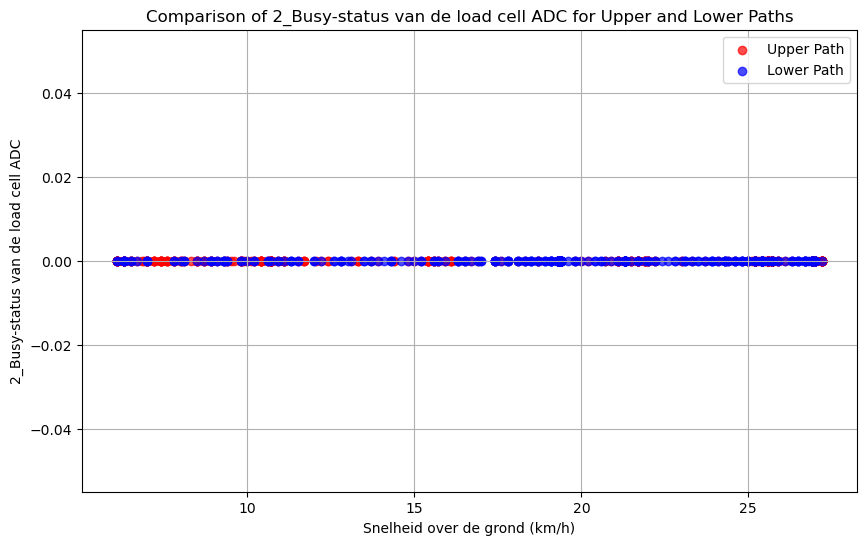

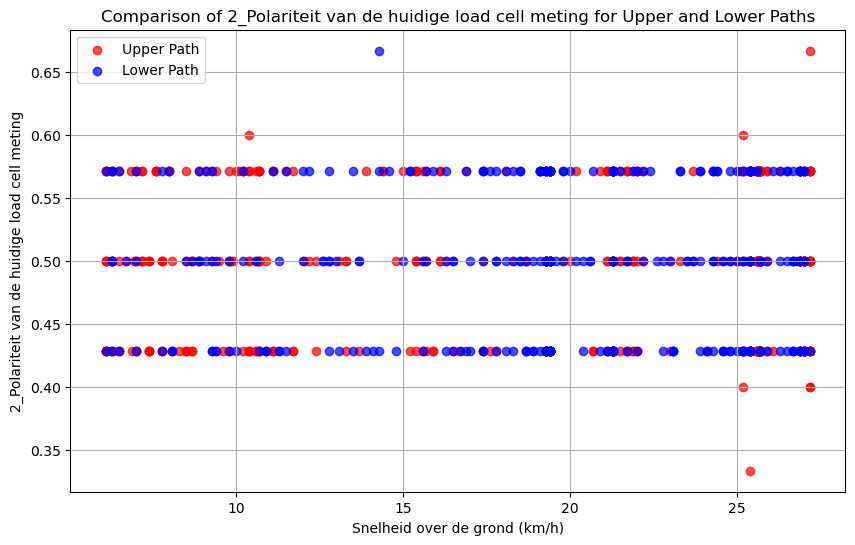

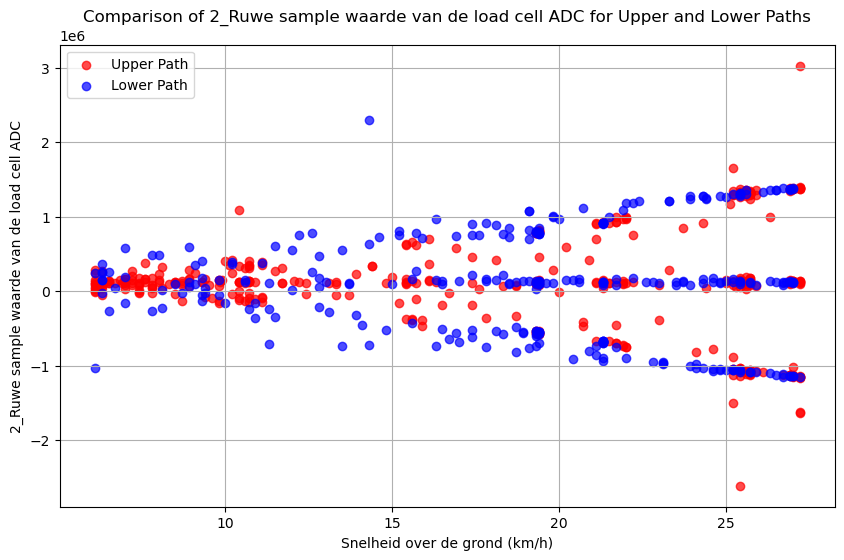

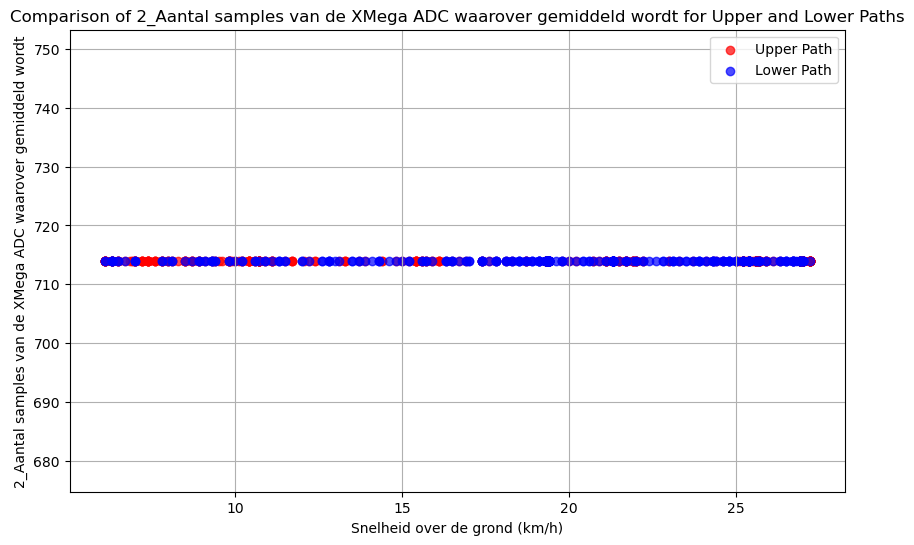

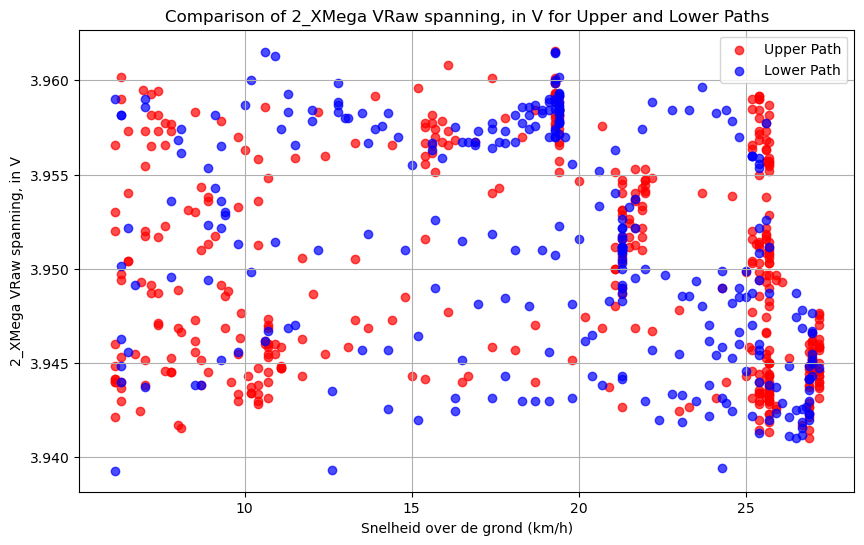

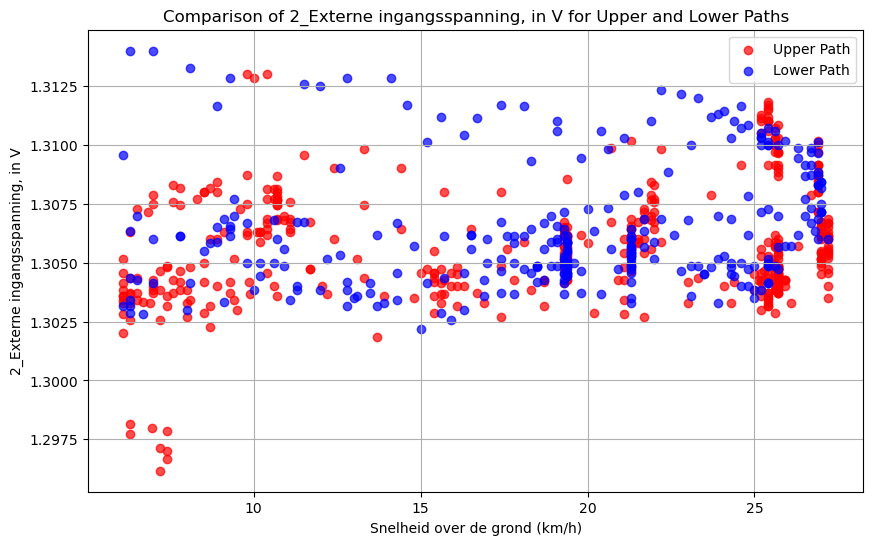

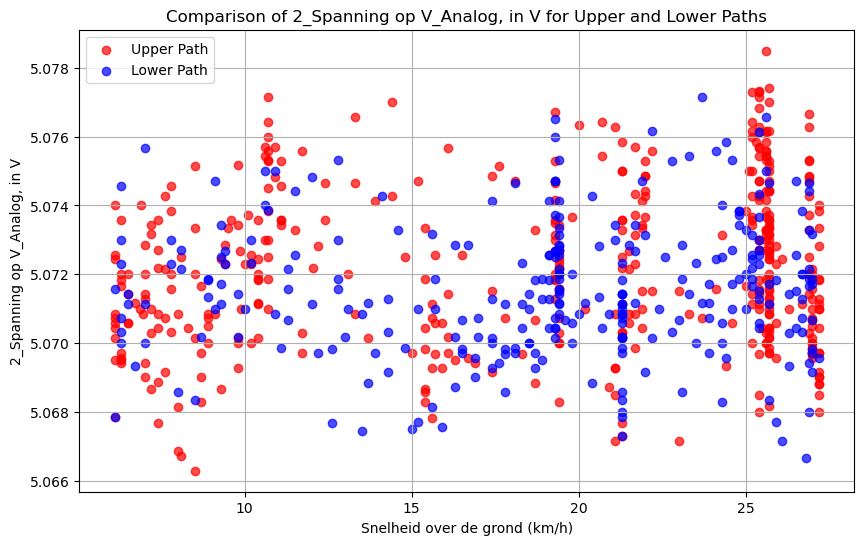

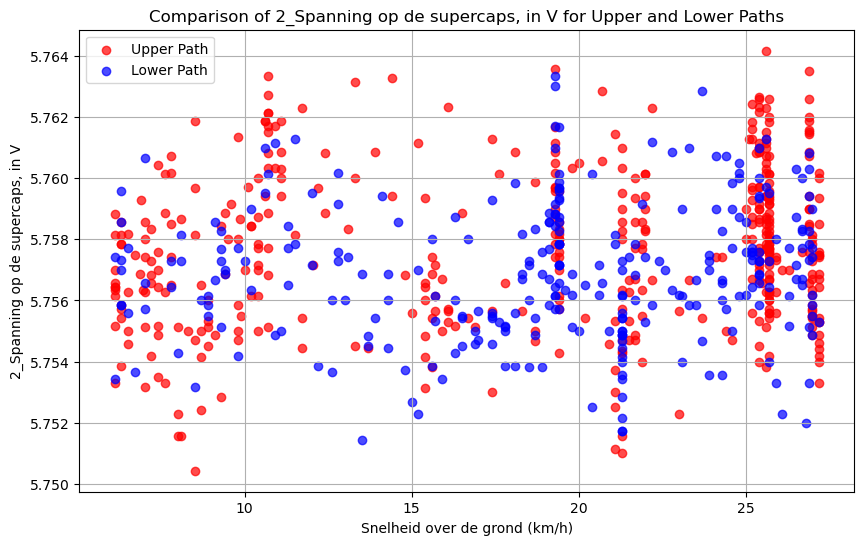

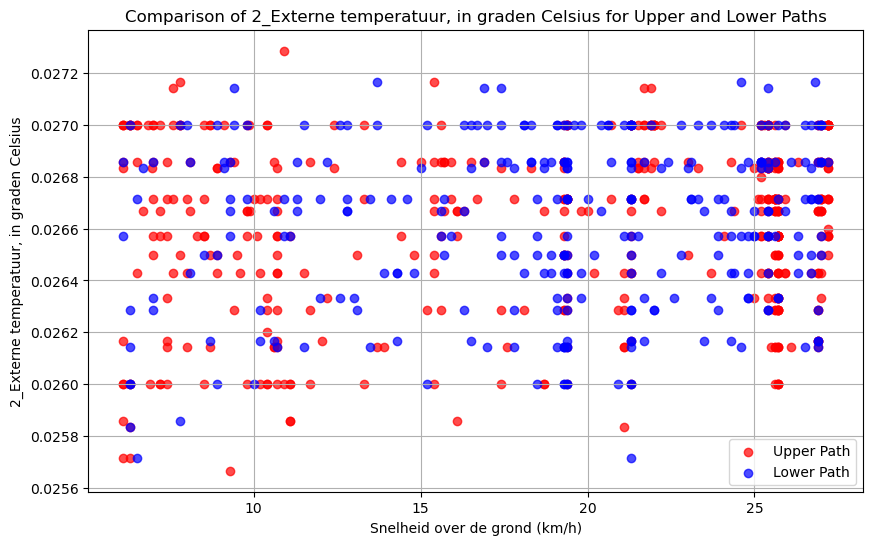

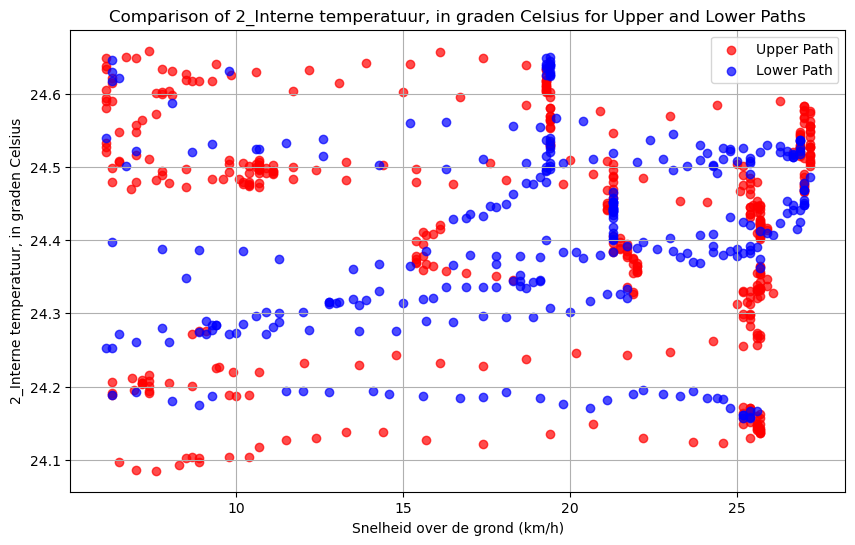

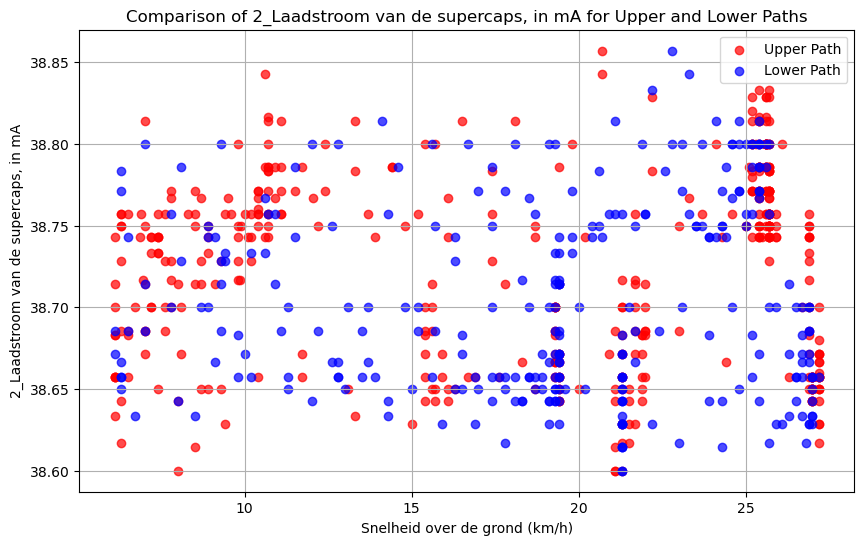

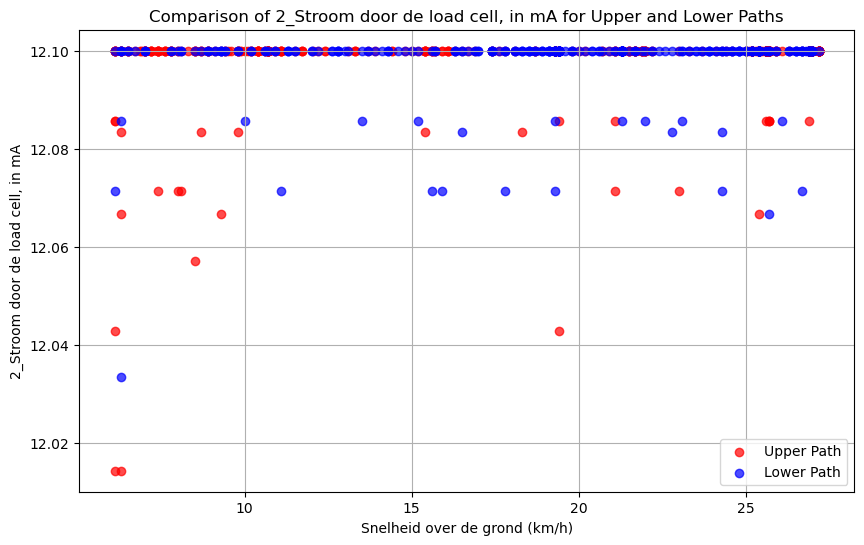

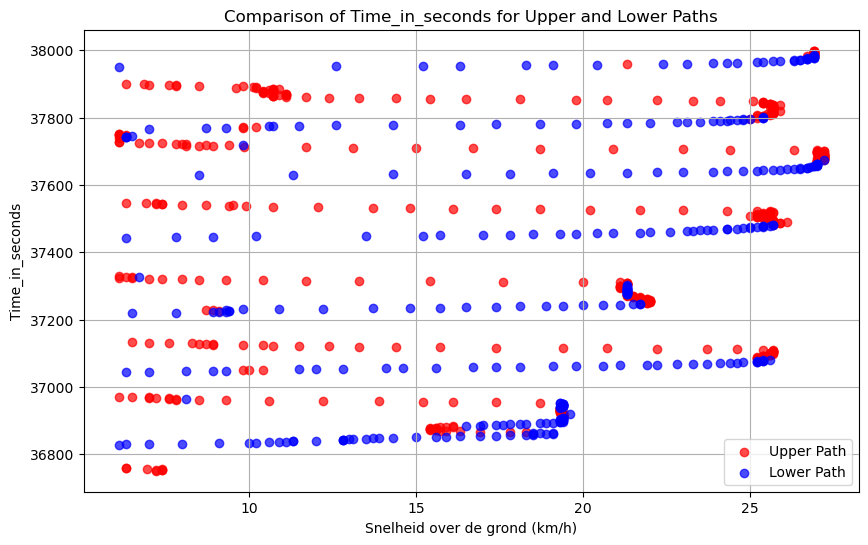

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]

# Filter for numeric columns only
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
columns_to_plot = [col for col in numeric_columns if col != '1_Snelheid over de grond in km/h']

# Iterate over all numeric columns except x to plot them as y
for col in columns_to_plot:
    # Extract x and y for each path
    x_upper = upper_path['1_Snelheid over de grond in km/h']
    y_upper = upper_path[col]
    x_lower = lower_path['1_Snelheid over de grond in km/h']
    y_lower = lower_path[col]

    # Ensure that x and y have the same length by dropping NaN values
    x_upper, y_upper = x_upper.align(y_upper, join='inner')
    x_lower, y_lower = x_lower.align(y_lower, join='inner')

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(x_upper, y_upper, label="Upper Path", color="red", alpha=0.7)
    plt.scatter(x_lower, y_lower, label="Lower Path", color="blue", alpha=0.7)
    plt.xlabel("Snelheid over de grond (km/h)")
    plt.ylabel(col)
    plt.title(f"Comparison of {col} for Upper and Lower Paths")
    plt.legend()
    plt.grid(True)
    plt.show()
